# Ejemplo de Prueba A/B en un Sitio Ecommerce Usando Aprendizaje Bayesiano

En este cuaderno, realizaremos un análisis de prueba A/B utilizando el aprendizaje Bayesiano. Este análisis  es común en sitios de ecommerce para determinar si un cambio en la interfaz del sitio (como el diseño de un botón de compra) resulta en una mejor tasa de clics (CTR).
    

## 1. Importar Librerías Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
plt.style.use('seaborn-darkgrid')
    

## 2. Definir la Distribución Previa

In [2]:
# Suponemos que no tenemos conocimiento previo sobre la tasa de clics, 
# por lo que utilizamos una distribución uniforme representada por una Beta(1,1)
alpha_prior_A = 1
beta_prior_A = 1
alpha_prior_B = 1
beta_prior_B = 1
prior_A = beta(alpha_prior_A, beta_prior_A)
prior_B = beta(alpha_prior_B, beta_prior_B)
    

## 3. Observar los Datos de la Prueba A/B

In [3]:
# Datos de clics para la versión A del sitio
clics_A = 50  # Supongamos que hubo 50 clics
no_clics_A = 950  # y 950 veces no se clickeó, de 1000 visualizaciones

# Datos de clics para la versión B del sitio
clics_B = 80  # Supongamos que hubo 80 clics
no_clics_B = 920  # y 920 veces no se clickeó, de 1000 visualizaciones
    

## 4. Actualizar la Creencia (Distribución Posterior)

In [4]:
# Actualizar los parámetros para la distribución posterior Beta de ambas versiones
alpha_posterior_A = alpha_prior_A + clics_A
beta_posterior_A = beta_prior_A + no_clics_A
posterior_A = beta(alpha_posterior_A, beta_posterior_A)

alpha_posterior_B = alpha_prior_B + clics_B
beta_posterior_B = beta_prior_B + no_clics_B
posterior_B = beta(alpha_posterior_B, beta_posterior_B)
    

## 5. Visualizar las Distribuciones

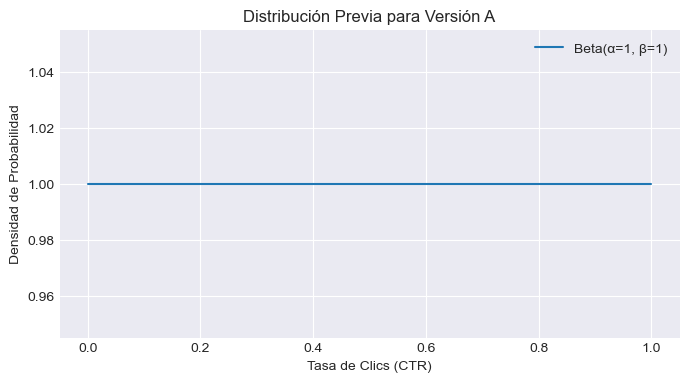

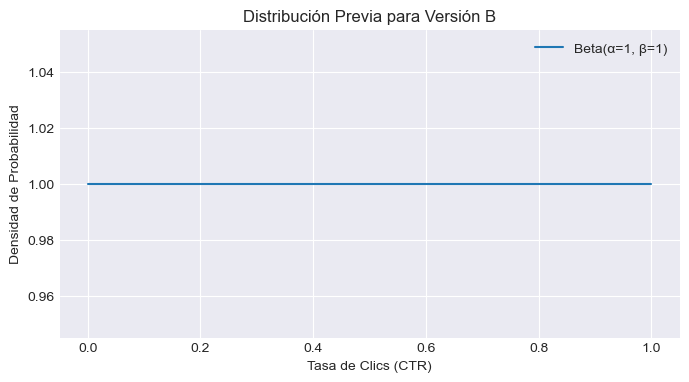

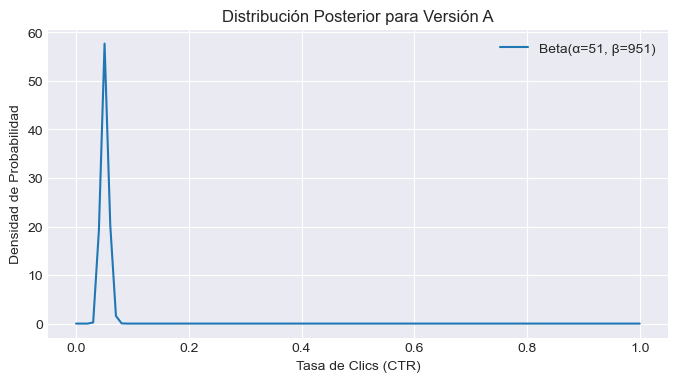

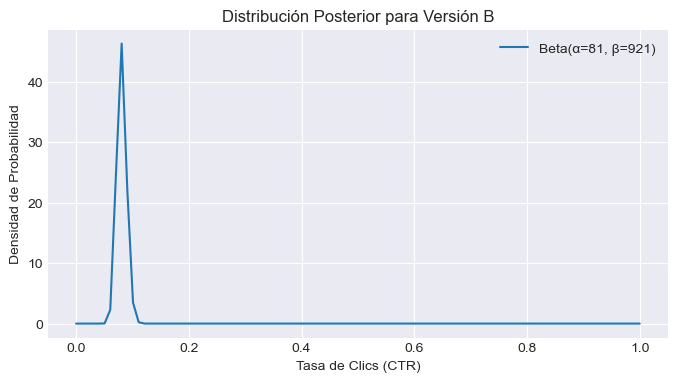

In [5]:
# Función para graficar la distribución Beta
def graficar_beta(a, b, título):
    valores_theta = np.linspace(0, 1, 100)
    pdf_vals = beta(a, b).pdf(valores_theta)
    plt.figure(figsize=(8, 4))
    plt.plot(valores_theta, pdf_vals, label=f'Beta(α={a}, β={b})')
    plt.title(título)
    plt.xlabel('Tasa de Clics (CTR)')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    plt.show()

# Graficar la distribución previa para ambas versiones
graficar_beta(alpha_prior_A, beta_prior_A, 'Distribución Previa para Versión A')
graficar_beta(alpha_prior_B, beta_prior_B, 'Distribución Previa para Versión B')

# Graficar la distribución posterior para ambas versiones
graficar_beta(alpha_posterior_A, beta_posterior_A, 'Distribución Posterior para Versión A')
graficar_beta(alpha_posterior_B, beta_posterior_B, 'Distribución Posterior para Versión B')
    

## 6. Visualizar los Datos de la Prueba A/B

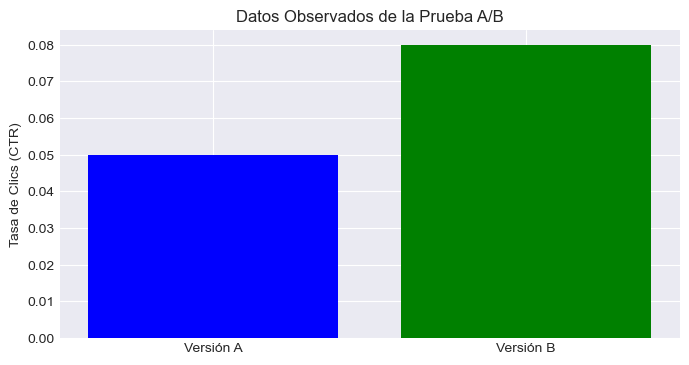

In [6]:
# Graficar los datos observados como barras para cada versión
plt.figure(figsize=(8, 4))
bar_locations = np.array([1, 2])
plt.bar(bar_locations, [clics_A / (clics_A + no_clics_A), clics_B / (clics_B + no_clics_B)], color=['blue', 'green'])
plt.xticks(bar_locations, ['Versión A', 'Versión B'])
plt.ylabel('Tasa de Clics (CTR)')
plt.title('Datos Observados de la Prueba A/B')
plt.show()
    